In [16]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

def load_images_and_labels(folder):
    images = []
    labels = []
    valid_extensions = ('.jpg')
    for image_filename in os.listdir(folder):
        if not image_filename.lower().endswith(valid_extensions):
            continue
        image_path = os.path.join(folder, image_filename)
        try:
            img = tf.keras.preprocessing.image.load_img(image_path, target_size=(100, 100))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img_array)
            label = image_filename.split('_')[0]  
            labels.append(label)
        except Exception as e:
            print(f"Error reading {image_path}: {str(e)}")
    return np.array(images), np.array(labels)

train_data_dir = 'C:\\Users\\shawn\\Downloads\\archive\\train'
test_data_dir = 'C:\\Users\\shawn\\Downloads\\archive\\test'

X_train, y_train = load_images_and_labels(train_data_dir)
X_test, y_test = load_images_and_labels(test_data_dir)


unique_classes = np.unique(np.concatenate((y_train, y_test)))

le = LabelEncoder()
le.fit(unique_classes)
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

num_classes = len(unique_classes)

y_train_categorical = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_categorical = to_categorical(y_test_encoded, num_classes=num_classes)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model(num_classes):
    model = Sequential()
    model.add(Input(shape=(100, 100, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))  
    return model

cnn_model = create_cnn_model(num_classes=num_classes)
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 64
epochs = 25


train_generator = train_datagen.flow(X_train, y_train_categorical, batch_size=batch_size)
validation_generator = test_datagen.flow(X_test, y_test_categorical, batch_size=batch_size)

history = cnn_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)


c:\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/25


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.3692 - loss: 1.6244 - val_accuracy: 0.3273 - val_loss: 1.0800
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.3940 - loss: 1.0567 - val_accuracy: 0.5091 - val_loss: 0.9517
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.5866 - loss: 0.9480 - val_accuracy: 0.8000 - val_loss: 0.7081
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.6980 - loss: 0.7432 - val_accuracy: 0.8545 - val_loss: 0.5789
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.6168 - loss: 0.7773 - val_accuracy: 0.8727 - val_loss: 0.6156
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.7493 - loss: 0.6472 - val_accuracy: 0.7818 - val_loss: 0.8315
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.7667 - loss: 0.6163 - val_accuracy: 0.8364 - val_loss: 0.6384
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.8190 - loss: 0.5688 - val_accuracy: 0.8909 - val_loss: 0.5579
Epo

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
classification report:
              precision    recall  f1-score   support

       apple       0.90      1.00      0.95        19
      banana       1.00      0.89      0.94        18
      orange       0.94      0.94      0.94        18

    accuracy                           0.95        55
   macro avg       0.95      0.94      0.95        55
weighted avg       0.95      0.95      0.95        55

confusion matrix:
[[19  0  0]
 [ 1 16  1]
 [ 1  0 17]]


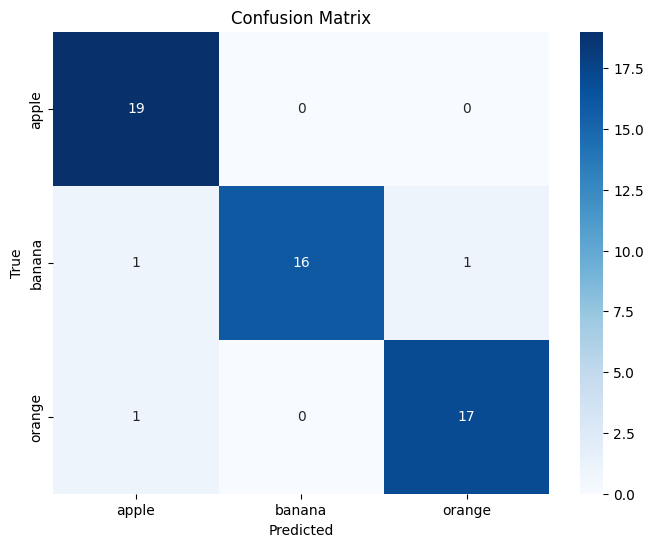

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(cnn_model.predict(X_test), axis=1)
y_true = np.argmax(y_test_categorical, axis=1)

print("classification report:")
print(classification_report(y_true, y_pred, target_names=le.classes_,zero_division=0))

print("confusion matrix:")
conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
